In [67]:
%matplotlib notebook

In [68]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [69]:
# Save path to data set in a variable
data_file = "baseline_df.csv"
df = pd.read_csv(data_file)
df

,dayofweek,timeofday,date,orders,tpv,customers,venues,fee,aov,orders_per_cust,ave_cust_spend,avg_orders_per_venue
0,Friday,08:15:00,2021-06-11,13926,100785.50388,13556,1956,1813.05216,21.102491,2.995607,21.678964,20.755213
1,Friday,08:15:00,2021-06-04,15204,109585.37952,14836,1988,1961.59320,21.017525,2.988317,21.538008,22.293403
2,Friday,08:15:00,2021-05-28,15588,112062.95892,15195,1994,2007.87012,20.962019,2.991524,21.505077,22.790873
3,Friday,08:15:00,2021-05-21,15326,108607.84884,14903,1997,1954.33236,20.663592,2.998814,21.249825,22.374468
4,Friday,08:15:00,2021-05-14,15358,109774.77372,14932,2041,1964.27592,20.841993,2.999106,21.436198,21.940859
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Friday,08:15:00,2018-07-13,15136,87956.06616,14801,2160,1491.35904,16.943955,2.982193,17.327831,20.427746
153,Friday,08:15:00,2018-07-06,16425,93540.20616,16096,2204,1574.93160,16.605754,2.975778,16.945690,21.727408
154,Friday,08:15:00,2018-06-29,17563,102022.26696,17131,2198,1675.41696,16.938779,2.989483,17.365492,23.293300
155,Friday,08:15:00,2018-06-22,16370,97187.59728,16020,2152,1656.78372,17.311648,2.979569,17.689771,22.182012


In [70]:
df.dtypes
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df

,dayofweek,timeofday,date,orders,tpv,customers,venues,fee,aov,orders_per_cust,ave_cust_spend,avg_orders_per_venue
0,Friday,08:15:00,2021-06-11,13926,100785.50388,13556,1956,1813.05216,21.102491,2.995607,21.678964,20.755213
1,Friday,08:15:00,2021-06-04,15204,109585.37952,14836,1988,1961.59320,21.017525,2.988317,21.538008,22.293403
2,Friday,08:15:00,2021-05-28,15588,112062.95892,15195,1994,2007.87012,20.962019,2.991524,21.505077,22.790873
3,Friday,08:15:00,2021-05-21,15326,108607.84884,14903,1997,1954.33236,20.663592,2.998814,21.249825,22.374468
4,Friday,08:15:00,2021-05-14,15358,109774.77372,14932,2041,1964.27592,20.841993,2.999106,21.436198,21.940859
...,...,...,...,...,...,...,...,...,...,...,...,...
152,Friday,08:15:00,2018-07-13,15136,87956.06616,14801,2160,1491.35904,16.943955,2.982193,17.327831,20.427746
153,Friday,08:15:00,2018-07-06,16425,93540.20616,16096,2204,1574.93160,16.605754,2.975778,16.945690,21.727408
154,Friday,08:15:00,2018-06-29,17563,102022.26696,17131,2198,1675.41696,16.938779,2.989483,17.365492,23.293300
155,Friday,08:15:00,2018-06-22,16370,97187.59728,16020,2152,1656.78372,17.311648,2.979569,17.689771,22.182012


# Sales Performance in 2020

In [71]:
# Slice data needed
df_sales = df[["date", "orders", "tpv", "customers", "venues", "fee"]]
df_sales
df_sales = df_sales.set_index("date")
df_sales.sort_index()

,orders,tpv,customers,venues,fee
date,,,,,
2018-06-15,17332,100645.74000,16939,2160,1692.85464
2018-06-22,16370,97187.59728,16020,2152,1656.78372
2018-06-29,17563,102022.26696,17131,2198,1675.41696
2018-07-06,16425,93540.20616,16096,2204,1574.93160
2018-07-13,15136,87956.06616,14801,2160,1491.35904
...,...,...,...,...,...
2021-05-14,15358,109774.77372,14932,2041,1964.27592
2021-05-21,15326,108607.84884,14903,1997,1954.33236
2021-05-28,15588,112062.95892,15195,1994,2007.87012


In [72]:
# # Sort per month
df_salesyear = df_sales["2020"]
df_salesyear = df_salesyear.reset_index()
df_salesyear["month"] = df_salesyear["date"].dt.strftime("%m")
df_salesyear.head()

,date,orders,tpv,customers,venues,fee,month
0,2020-12-25,1175,14404.22352,1125,145,255.84984,12
1,2020-12-18,11092,84133.42344,10789,1746,1492.35048,12
2,2020-12-11,13329,97868.36664,12987,1854,1725.63048,12
3,2020-12-04,13445,95619.22668,13133,1874,1701.71928,12
4,2020-11-27,13859,99618.43320,13524,1939,1779.22656,11


In [73]:
# Compute for total sales and income per month for year 2020
df_salesyear = df_salesyear[["month", "tpv", "fee"]]
df_salesyear = df_salesyear.groupby(["month"]).agg(np.sum)
df_salesyear

df_salesyear_graph = df_salesyear.reset_index()
df_salesyear_graph

,month,tpv,fee
0,01,342429.84576,5808.52620
1,02,397376.32536,6762.43728
2,03,335714.96844,5831.70840
3,04,258846.26328,4614.30756
4,05,445299.99804,7974.32688
5,06,364502.59524,6534.87264
6,07,415124.64684,7407.48564
7,08,385488.66816,6898.23540
8,09,411274.47708,7345.14156
9,10,455172.23268,8142.11352


In [74]:
# Compute cost of sales
df_salesyear_graph["pass on"] = df_salesyear_graph["tpv"]-df_salesyear_graph["fee"]
df_salesyear_graph["%fee"] = df_salesyear_graph["fee"]/df_salesyear_graph["tpv"]
df_salesyear_graph


,month,tpv,fee,pass on,%fee
0,01,342429.84576,5808.52620,336621.31956,0.016963
1,02,397376.32536,6762.43728,390613.88808,0.017018
2,03,335714.96844,5831.70840,329883.26004,0.017371
3,04,258846.26328,4614.30756,254231.95572,0.017826
4,05,445299.99804,7974.32688,437325.67116,0.017908
5,06,364502.59524,6534.87264,357967.72260,0.017928
6,07,415124.64684,7407.48564,407717.16120,0.017844
7,08,385488.66816,6898.23540,378590.43276,0.017895
8,09,411274.47708,7345.14156,403929.33552,0.017859
9,10,455172.23268,8142.11352,447030.11916,0.017888


In [75]:
# Stats with lowest %income 
df_salesyear_graph.describe()


,tpv,fee,pass on,%fee
count,12.000000,12.000000,12.000000,12.000000
mean,374949.612360,6628.775130,368320.837230,0.017668
std,59117.688452,1086.092458,58039.132382,0.000350
min,258846.263280,4614.307560,254231.955720,0.016963
25%,340751.126430,5825.912850,334936.804680,0.017635
50%,390814.377660,6830.336340,383839.961760,0.017835
75%,412237.019520,7360.727580,404876.291940,0.017890
max,455172.232680,8142.113520,447030.119160,0.017928


<IPython.core.display.Javascript object>


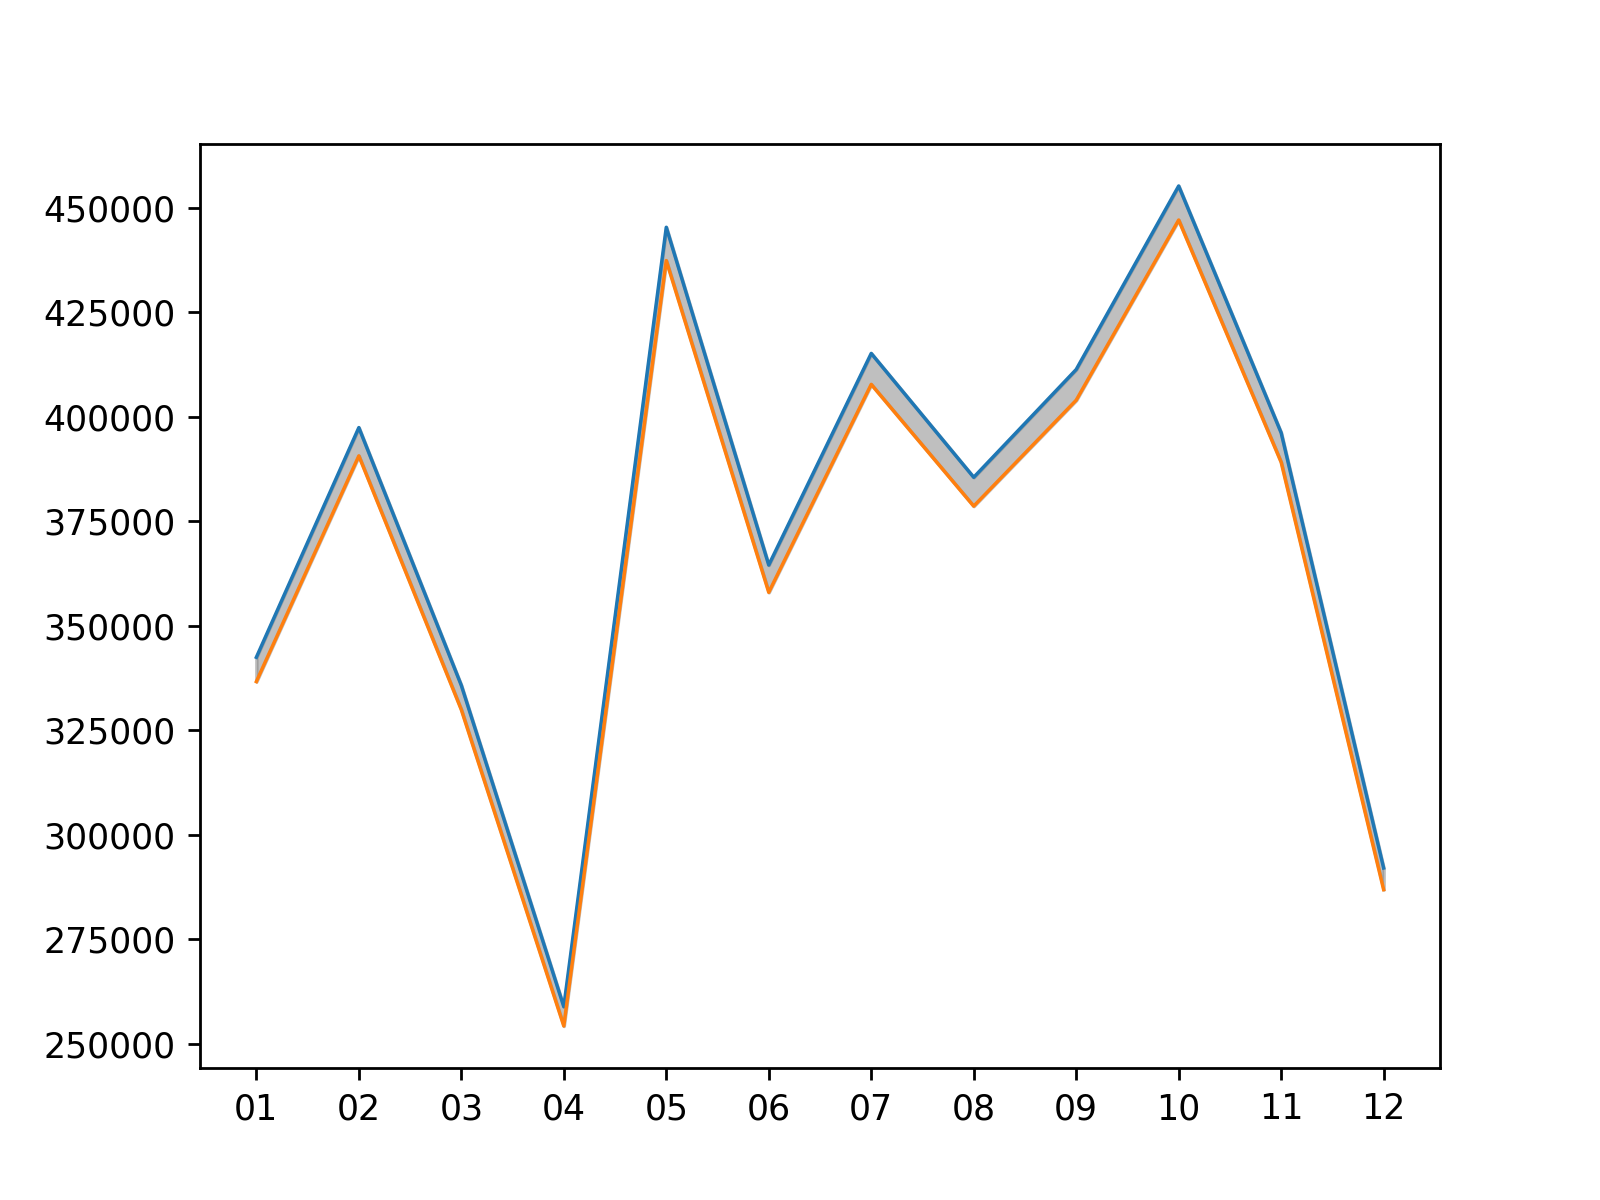

In [77]:
# Create line chart. Gray area represents gross profit
# Use matplotlib
x_axis = df_salesyear_graph["month"]
y_axis1 = df_salesyear_graph["tpv"]
y_axis2 = df_salesyear_graph["pass on"]

plt.plot(x_axis, y_axis1, y_axis2, linewidth = 1)
plt.fill_between(x_axis, y_axis1, y_axis2, color='gray', alpha=0.5)
plt.show()


# Sales trend for 2021

In [78]:
df_sales

,orders,tpv,customers,venues,fee
date,,,,,
2021-06-11,13926,100785.50388,13556,1956,1813.05216
2021-06-04,15204,109585.37952,14836,1988,1961.59320
2021-05-28,15588,112062.95892,15195,1994,2007.87012
2021-05-21,15326,108607.84884,14903,1997,1954.33236
2021-05-14,15358,109774.77372,14932,2041,1964.27592
...,...,...,...,...,...
2018-07-13,15136,87956.06616,14801,2160,1491.35904
2018-07-06,16425,93540.20616,16096,2204,1574.93160
2018-06-29,17563,102022.26696,17131,2198,1675.41696


In [176]:
# Slice data for line plot

df_week = df_sales[["orders", "customers", "venues"]]
df_week = df_week["2021"]
df_week_graph = df_week.sort_values("date", ascending=True)

df_week_graph


,orders,customers,venues
date,,,
2021-01-01,603,586,192
2021-01-08,6595,6435,1215
2021-01-15,9427,9170,1527
2021-01-22,10795,10518,1653
2021-01-29,12267,12031,1799
2021-02-05,13171,12833,1831
2021-02-12,13369,13043,1872
2021-02-19,13270,12979,1851
2021-02-26,13145,12847,1869


In [178]:
df_week_graph.describe()

# Highest orders and customers engagement on May 28, possibly as an effect of AI implemented
# Highest venue engagment recored on May 14, possibly as an effect of AI implementated

,orders,customers,venues
count,24.000000,24.000000,24.000000
mean,12345.458333,12033.500000,1736.791667
std,3883.182312,3785.908506,462.148102
min,603.000000,586.000000,192.000000
25%,12435.750000,12136.000000,1823.000000
50%,13319.500000,13011.000000,1899.500000
75%,14558.250000,14210.500000,1963.250000
max,15588.000000,15195.000000,2041.000000


<IPython.core.display.Javascript object>


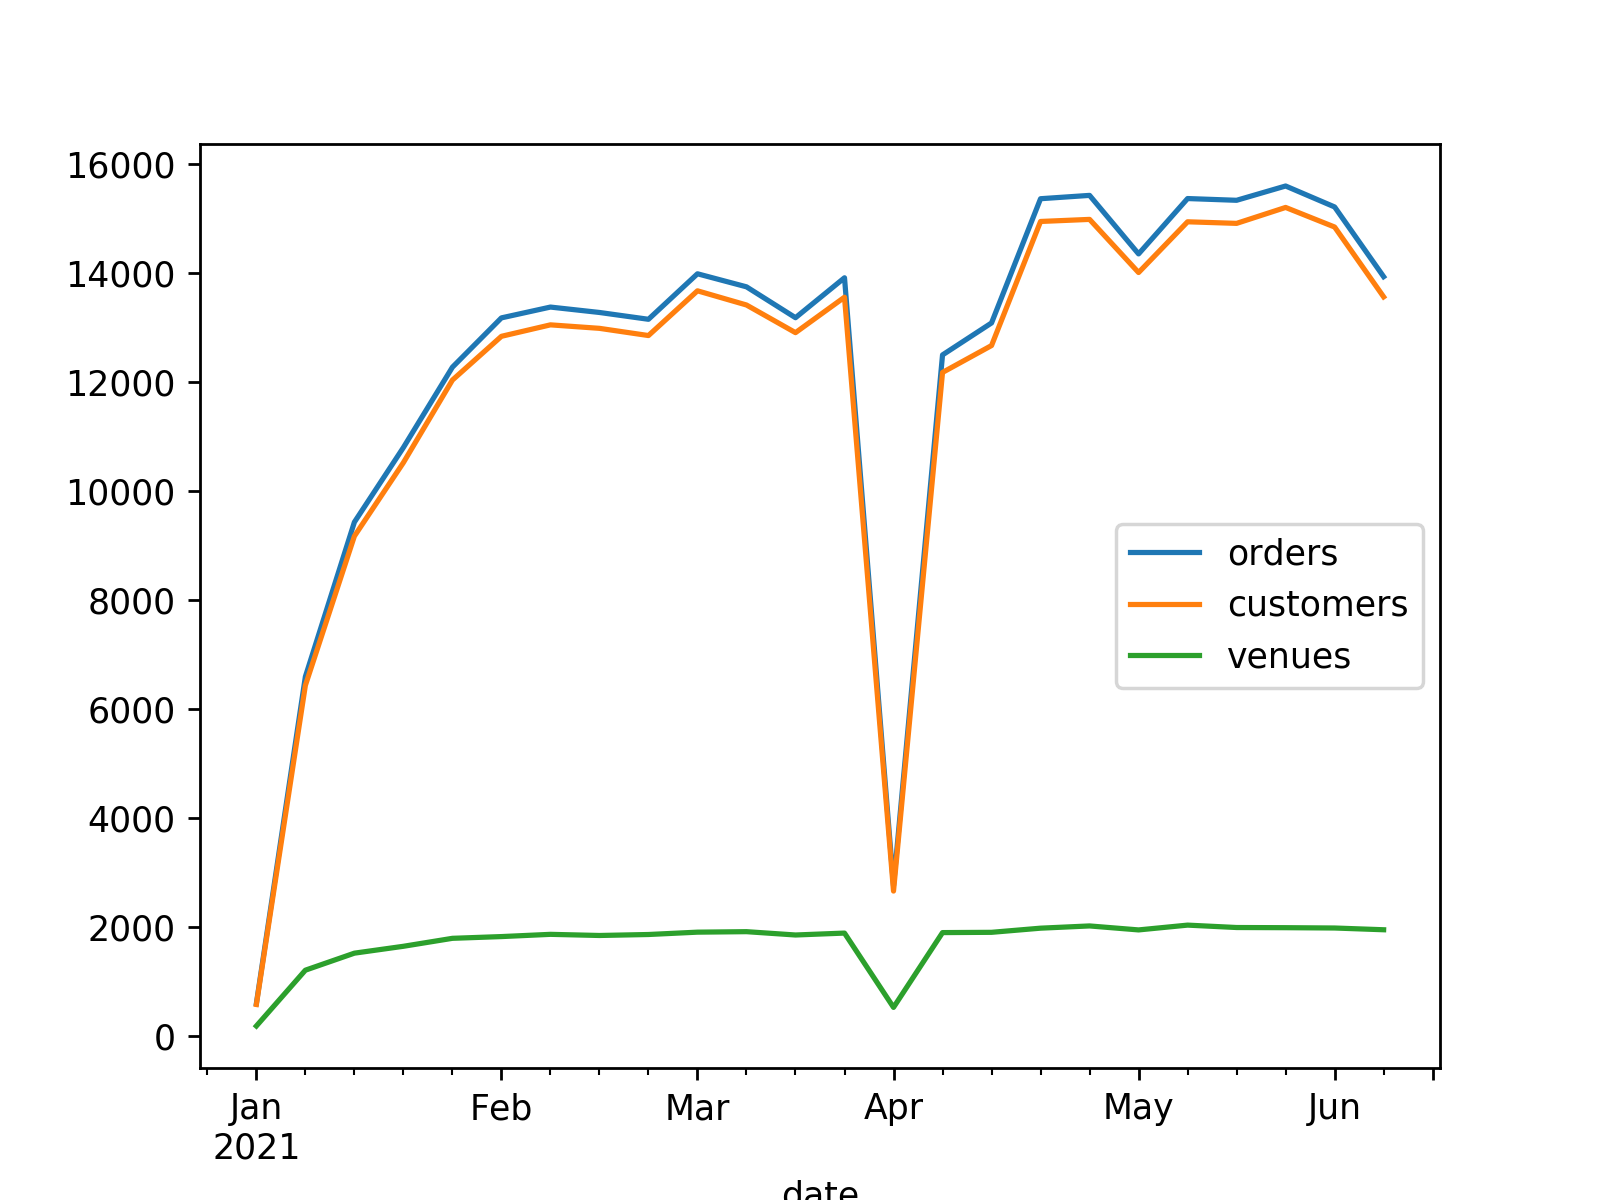

In [79]:
# Create line chart using pandas
df_week_graph.plot()


# Comparative Performance 2020 vs 2021

In [114]:
# Get 2020 and 2021 data

df_comp = df[["date", "orders", "customers", "venues"]]
df_comp["month"] = df_comp["date"].dt.strftime("%m")
df_comp["year"] = df_comp["date"].dt.strftime("%Y")
df_comp = df_comp.set_index("date")

df_comp.head()

C:\Users\rylac\Anaconda3\envs\PythonData2020_1\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\rylac\Anaconda3\envs\PythonData2020_1\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,orders,customers,venues,month,year
date,,,,,
2021-06-11,13926,13556,1956,06,2021
2021-06-04,15204,14836,1988,06,2021
2021-05-28,15588,15195,1994,05,2021
2021-05-21,15326,14903,1997,05,2021
2021-05-14,15358,14932,2041,05,2021


In [150]:
# Slice 2020 data from main df

df_comp2020 = df_comp["2020-06":"2020-01"]
df_comp2020 = df_comp2020.reset_index()
df_comp2020 = df_comp2020.rename(columns={"orders":"orders2020", "customers":"cust2020", "venues":"ven2020"})

df_comp2020

,date,orders2020,cust2020,ven2020,month,year
0,2020-06-26,12664,12325,1860,06,2020
1,2020-06-19,12614,12267,1837,06,2020
2,2020-06-12,12264,11973,1834,06,2020
3,2020-06-05,11888,11623,1755,06,2020
4,2020-05-29,12331,12057,1708,05,2020
5,2020-05-22,10955,10736,1627,05,2020
6,2020-05-15,11973,11690,1638,05,2020
7,2020-05-08,11602,11299,1595,05,2020
8,2020-05-01,11302,10999,1519,05,2020
9,2020-04-24,10710,10430,1571,04,2020


In [151]:
# Slice 2020 data from main df

df_comp2021 = df_comp["2021"]
df_comp2021 = df_comp2021.reset_index()
df_comp2021 = df_comp2021.rename(columns={"orders":"orders2021","customers":"cust2021", "venues":"ven2021"})

df_comp2021.head()

,date,orders2021,cust2021,ven2021,month,year
0,2021-06-11,13926,13556,1956,06,2021
1,2021-06-04,15204,14836,1988,06,2021
2,2021-05-28,15588,15195,1994,05,2021
3,2021-05-21,15326,14903,1997,05,2021
4,2021-05-14,15358,14932,2041,05,2021


In [152]:
df_compFull = pd.concat([df_comp2020, df_comp2021])

df_compFull.head()

,date,orders2020,cust2020,ven2020,month,year,orders2021,cust2021,ven2021
0,2020-06-26,12664.0,12325.0,1860.0,06,2020,NaN,NaN,NaN
1,2020-06-19,12614.0,12267.0,1837.0,06,2020,NaN,NaN,NaN
2,2020-06-12,12264.0,11973.0,1834.0,06,2020,NaN,NaN,NaN
3,2020-06-05,11888.0,11623.0,1755.0,06,2020,NaN,NaN,NaN
4,2020-05-29,12331.0,12057.0,1708.0,05,2020,NaN,NaN,NaN


In [153]:
# Set index to month

df_compFull_graph = df_compFull.groupby("month").agg(np.sum)
df_compFull_graph = df_compFull_graph[["orders2020", "orders2021", "cust2020", "cust2021", "ven2020", "ven2021"]]

df_compFull_graph

,orders2020,orders2021,cust2020,cust2021,ven2020,ven2021
month,,,,,,
01,56856.0,39687.0,55507.0,38740.0,9941.0,6386.0
02,64599.0,52955.0,63150.0,51702.0,9323.0,7423.0
03,52010.0,54799.0,50790.0,53524.0,8256.0,7588.0
04,32514.0,59105.0,31593.0,57414.0,5174.0,8357.0
05,58163.0,60615.0,56781.0,59032.0,8087.0,7985.0
06,49430.0,29130.0,48188.0,28392.0,7286.0,3944.0


<IPython.core.display.Javascript object>


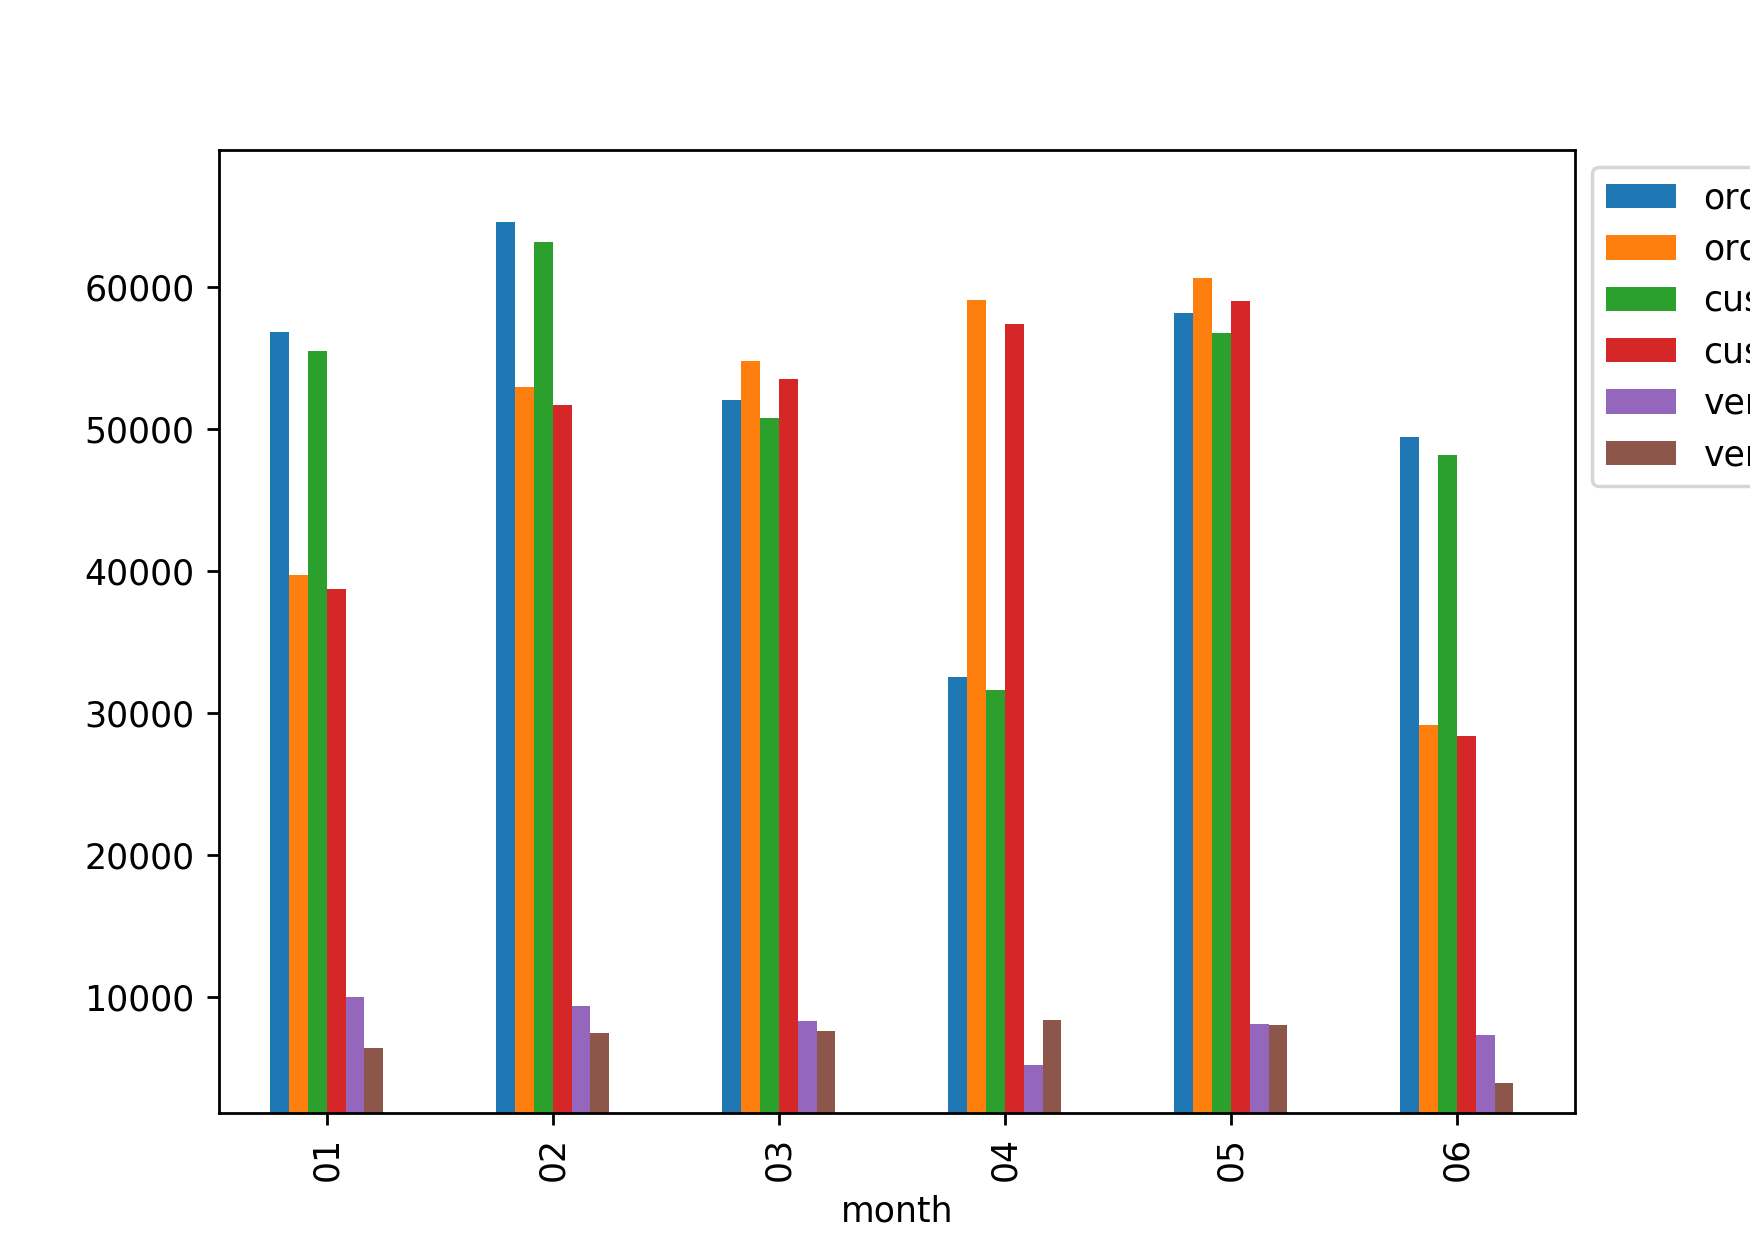

In [175]:
# Create bar chart

df_compFull_graph.plot(kind="bar", figsize=(7,5))

plt.legend(bbox_to_anchor=(1,1))

# plt.legend(bbox_to_anchor=(1.0, .0))

# Correlation matrix orders, customers and venues

## effect of AI implementation. see also trend above

In [200]:
# Slice dataframe of before AI implementation
df_corr = df[["date","orders", "customers", "venues", "tpv", "fee"]]

df_corr

,date,orders,customers,venues,tpv,fee
0,2021-06-11,13926,13556,1956,100785.50388,1813.05216
1,2021-06-04,15204,14836,1988,109585.37952,1961.59320
2,2021-05-28,15588,15195,1994,112062.95892,2007.87012
3,2021-05-21,15326,14903,1997,108607.84884,1954.33236
4,2021-05-14,15358,14932,2041,109774.77372,1964.27592
...,...,...,...,...,...,...
152,2018-07-13,15136,14801,2160,87956.06616,1491.35904
153,2018-07-06,16425,16096,2204,93540.20616,1574.93160
154,2018-06-29,17563,17131,2198,102022.26696,1675.41696
155,2018-06-22,16370,16020,2152,97187.59728,1656.78372


In [201]:
df_corr.corr()

,orders,customers,venues,tpv,fee
orders,1.000000,0.999953,0.951156,0.933124,0.881560
customers,0.999953,1.000000,0.951420,0.931767,0.879870
venues,0.951156,0.951420,1.000000,0.869746,0.812468
tpv,0.933124,0.931767,0.869746,1.000000,0.991522
fee,0.881560,0.879870,0.812468,0.991522,1.000000


<IPython.core.display.Javascript object>


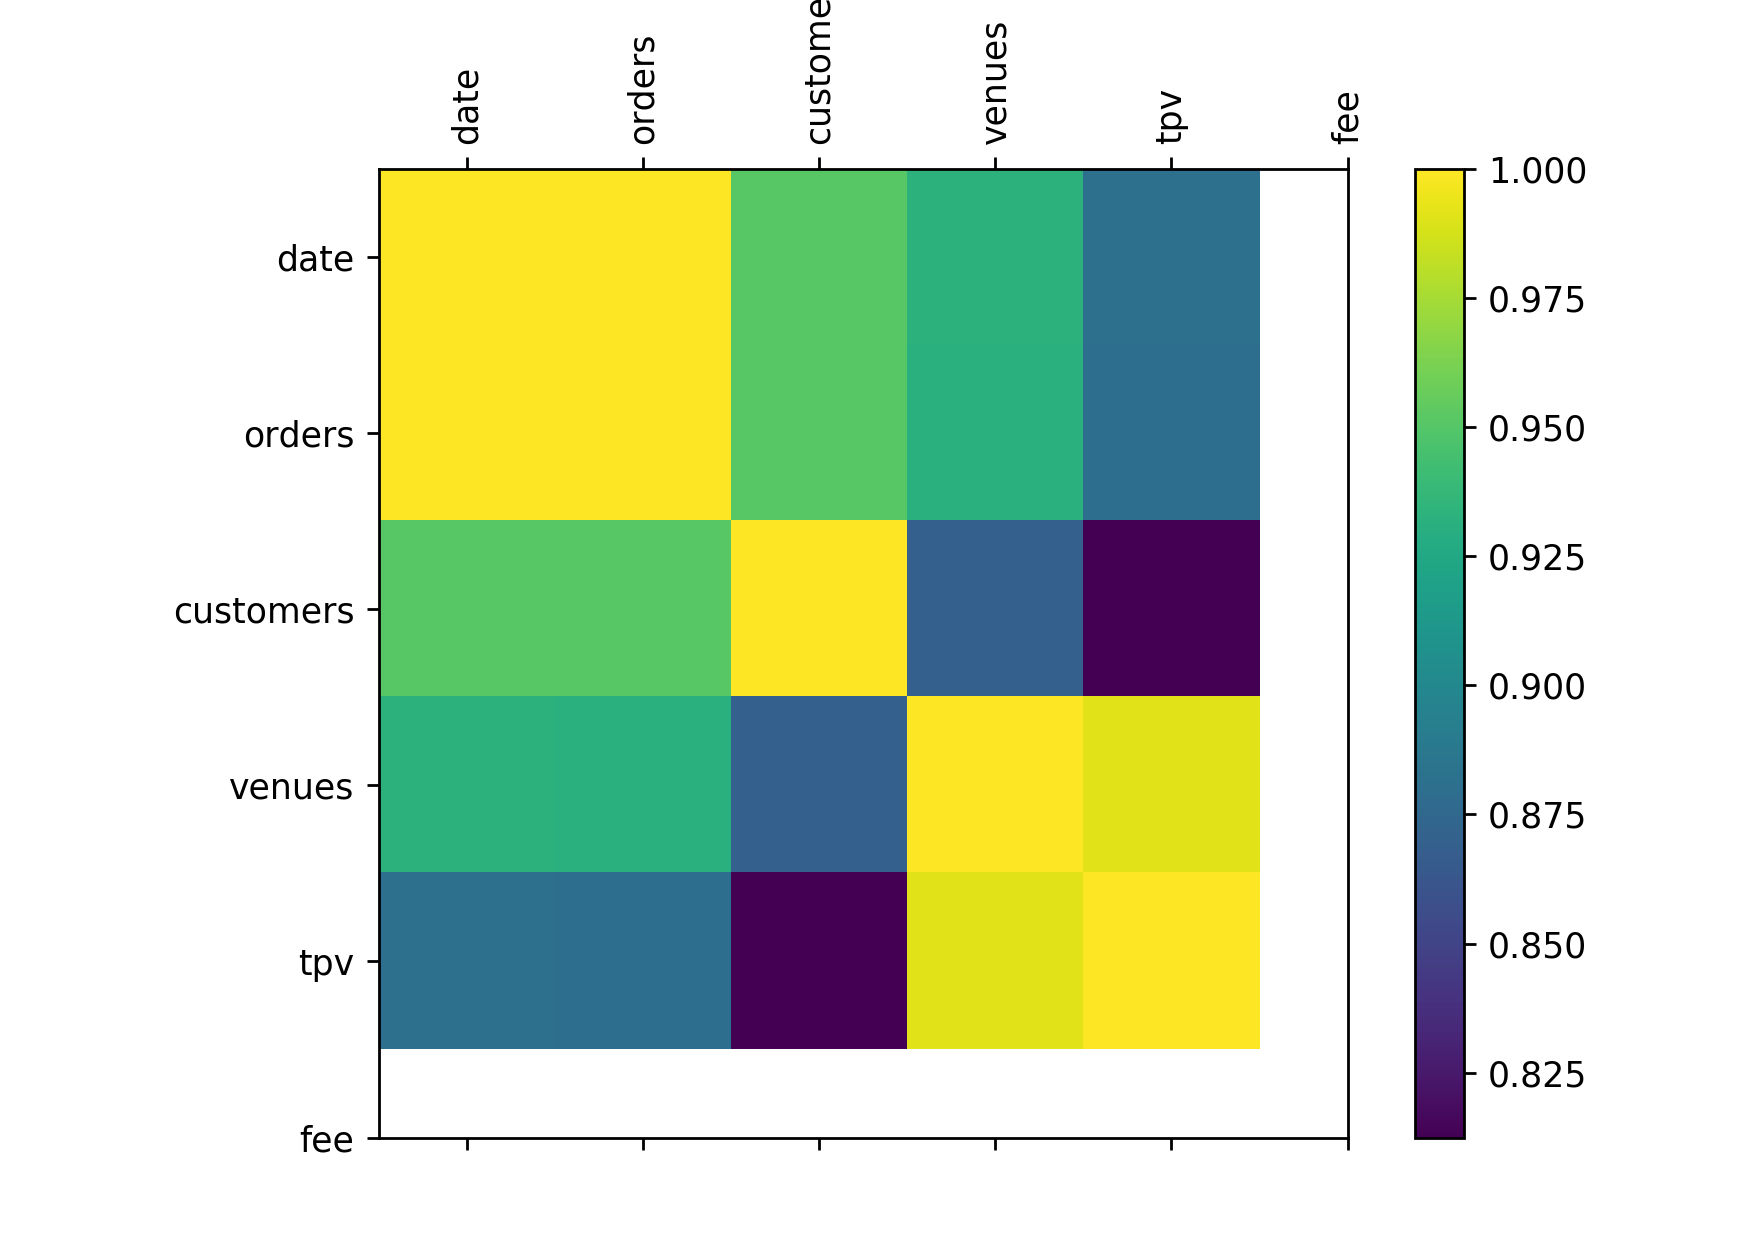

In [202]:
f = plt.figure(figsize=(7, 5))
plt.matshow(df_corr.corr(), fignum=f.number, data=True)
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=10,rotation=90)
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

In [204]:
# Slice dataframe of before AI implementation
df_corr_beforeAI = df[["date","orders", "customers", "venues", "tpv", "fee"]]
df_corr_beforeAI = df_corr_beforeAI.set_index("date")
df_corr_beforeAI = df_corr_beforeAI["2021-04":]
df_corr_beforeAI

,orders,customers,venues,tpv,fee
date,,,,,
2021-04-30,15416,14976,2026,109485.50652,1952.14536
2021-04-23,15355,14938,1985,109318.30308,1944.79704
2021-04-16,13078,12664,1909,93278.08692,1674.51300
2021-04-09,12492,12171,1904,90458.98560,1600.65072
2021-04-02,2764,2665,533,27883.72512,495.22428
...,...,...,...,...,...
2018-07-13,15136,14801,2160,87956.06616,1491.35904
2018-07-06,16425,16096,2204,93540.20616,1574.93160
2018-06-29,17563,17131,2198,102022.26696,1675.41696


In [205]:
df_corr_beforeAI.corr()

,orders,customers,venues,tpv,fee
orders,1.000000,0.999955,0.952606,0.938900,0.892081
customers,0.999955,1.000000,0.952791,0.937719,0.890629
venues,0.952606,0.952791,1.000000,0.882268,0.831514
tpv,0.938900,0.937719,0.882268,1.000000,0.992310
fee,0.892081,0.890629,0.831514,0.992310,1.000000


<IPython.core.display.Javascript object>


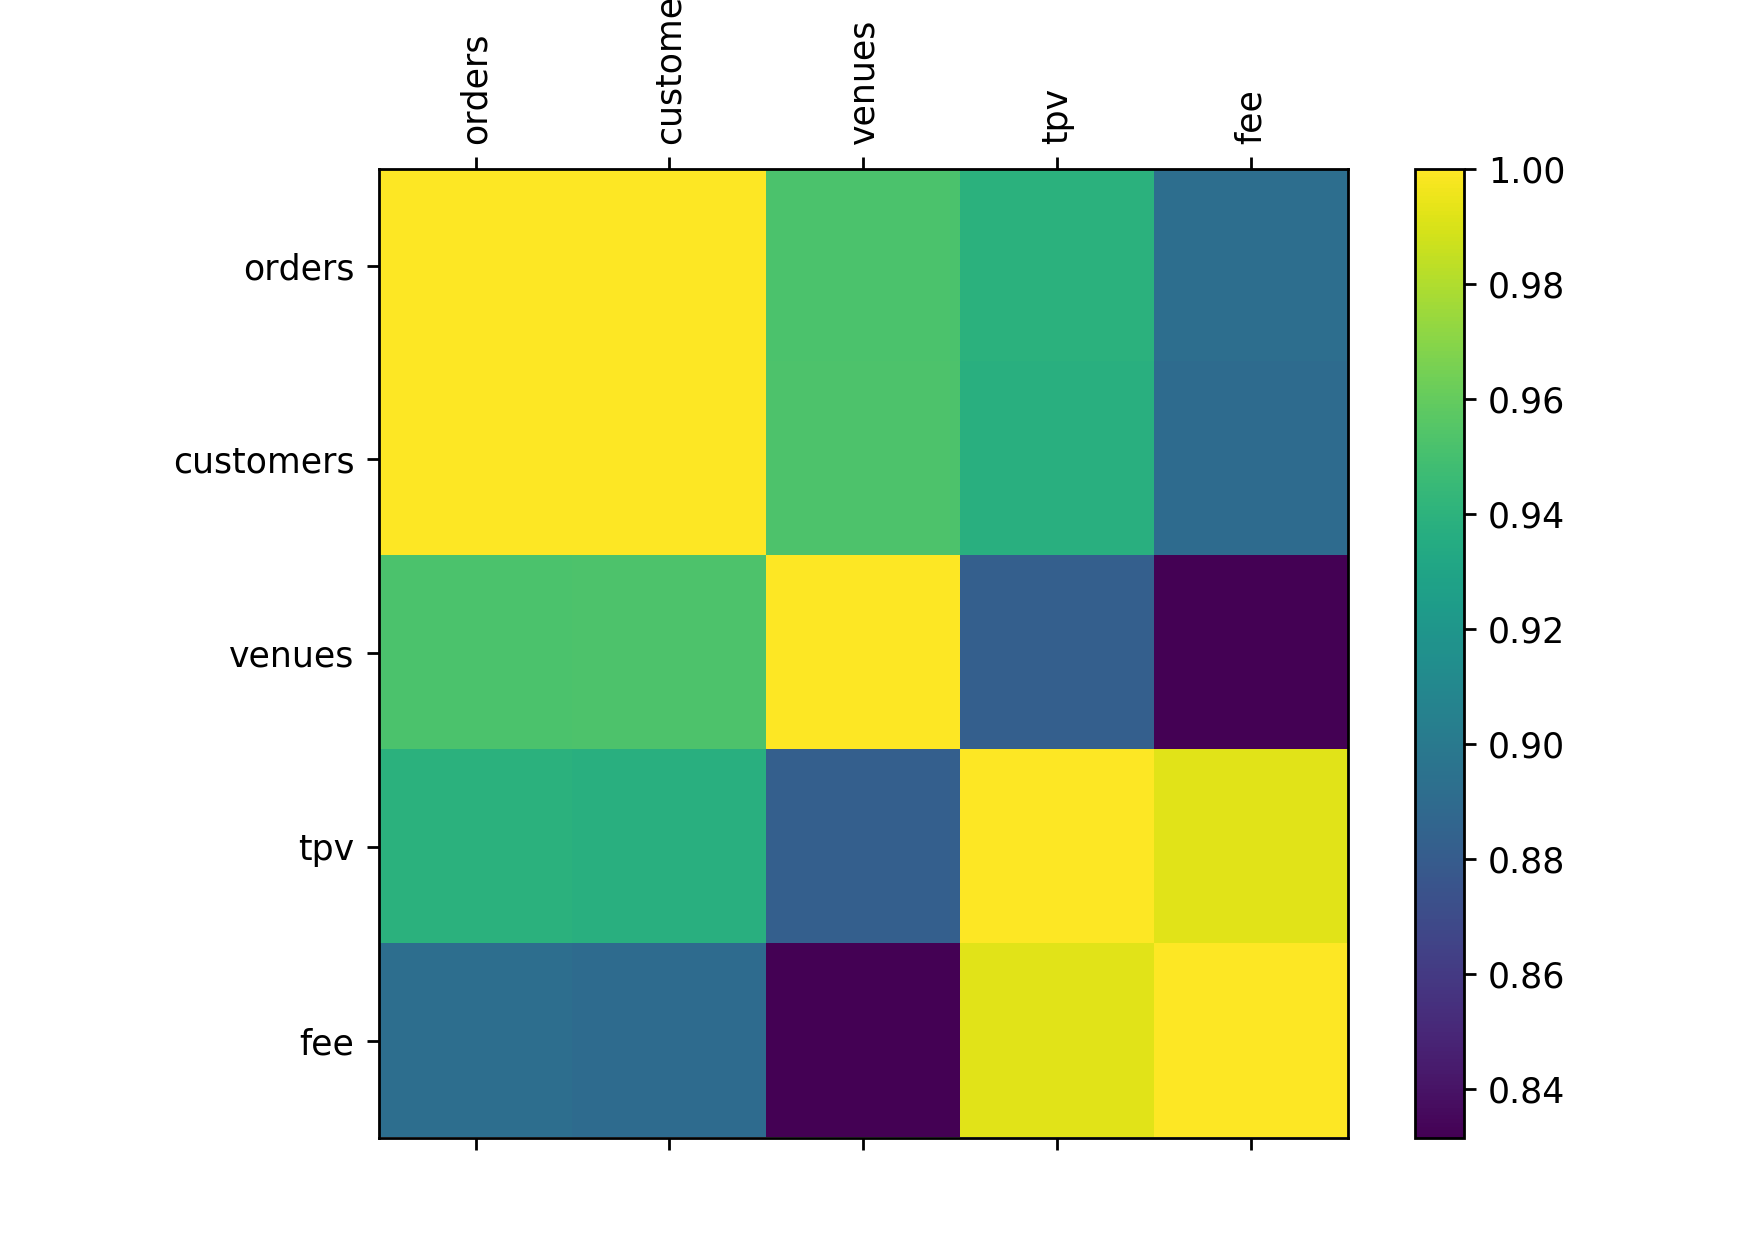

In [206]:
f = plt.figure(figsize=(7, 5))
plt.matshow(df_corr_beforeAI.corr(), fignum=f.number, data=True)
plt.xticks(range(df_corr_beforeAI.shape[1]), df_corr_beforeAI.columns, fontsize=10,rotation=90)
plt.yticks(range(df_corr_beforeAI.shape[1]), df_corr_beforeAI.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)

In [207]:
# Slice dataframe of after AI implementation
df_corr_afterAI = df[["date","orders", "customers", "venues", "tpv", "fee"]]
df_corr_afterAI = df_corr_afterAI.set_index("date")
df_corr_afterAI = df_corr_afterAI[:"2021-05"]
df_corr_afterAI

,orders,customers,venues,tpv,fee
date,,,,,
2021-06-11,13926,13556,1956,100785.50388,1813.05216
2021-06-04,15204,14836,1988,109585.37952,1961.59320
2021-05-28,15588,15195,1994,112062.95892,2007.87012
2021-05-21,15326,14903,1997,108607.84884,1954.33236
2021-05-14,15358,14932,2041,109774.77372,1964.27592
2021-05-07,14343,14002,1953,103426.37928,1863.44064


In [208]:
df_corr_afterAI.corr()

,orders,customers,venues,tpv,fee
orders,1.000000,0.999235,0.777096,0.988571,0.992084
customers,0.999235,1.000000,0.759066,0.991959,0.995471
venues,0.777096,0.759066,1.000000,0.742438,0.727042
tpv,0.988571,0.991959,0.742438,1.000000,0.998541
fee,0.992084,0.995471,0.727042,0.998541,1.000000


<IPython.core.display.Javascript object>


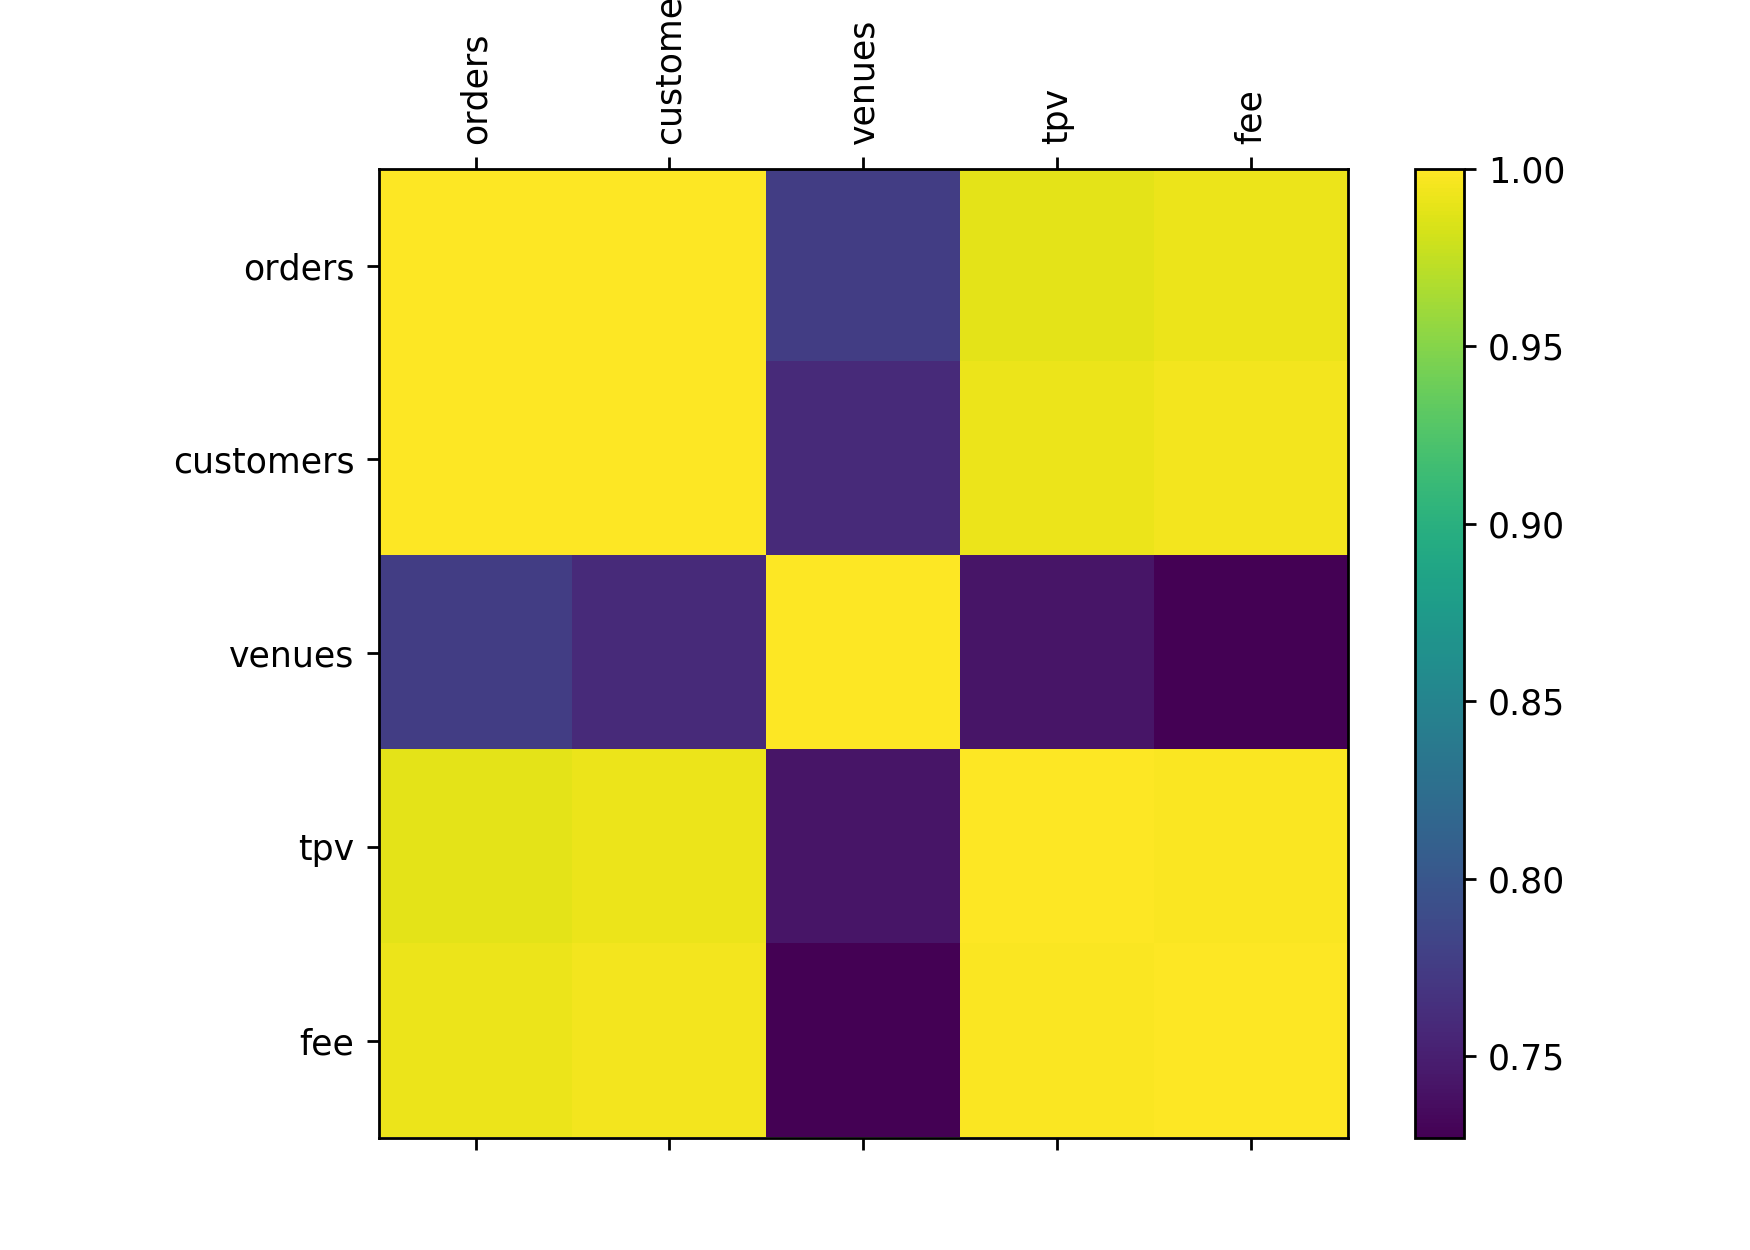

In [209]:
f = plt.figure(figsize=(7, 5))
plt.matshow(df_corr_afterAI.corr(), fignum=f.number, data=True)
plt.xticks(range(df_corr_afterAI.shape[1]), df_corr_afterAI.columns, fontsize=10,rotation=90)
plt.yticks(range(df_corr_afterAI.shape[1]), df_corr_afterAI.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)